In [ ]:
!pip install modAL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***First Dataset***
______________________________________________

# ***Using MNIST dataset with 3 Active Learning Strategy***
____________________________________________________________________

In [ ]:
# import necessary libraries
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

# scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
# initialize a small labeled set of 100 data points
n_initial = 50
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

In [ ]:
# initialize a random forest classifier
clf = RandomForestClassifier()

In [ ]:
# initialize performance lists
train_acc_margin_1 = []
test_acc_margin_1 = []
train_acc_entropy_1 = []
test_acc_entropy_1 = []
train_acc_lc_1 = []
test_acc_lc_1 = []

# ***Margin Sampling Strategy***

In [ ]:
# create an active learner with the margin sampling strategy
learner_margin = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=margin_sampling
)
# train the classifiers with active learning
n_queries = 20 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using margin sampling
    query_idx_margin, query_instance_margin = learner_margin.query(X_train, n_instances=50)
    # get labels for the queried instances
    y_query_margin = y_train[query_idx_margin]
    # teach the learners the queried instances
    learner_margin.teach(X_train[query_idx_margin], y_query_margin)
    # evaluate the learners on the training and testing sets
    training_accuracy_margin = learner_margin.score(X_train, y_train)
    testing_accuracy_margin = learner_margin.score(X_test, y_test)
    # store the performance
    train_acc_margin_1.append(training_accuracy_margin)
    test_acc_margin_1.append(testing_accuracy_margin)
    # print the results
    print(f"Margin Sampling: Training accuracy = {training_accuracy_margin:.3f}, Test accuracy = {testing_accuracy_margin:.3f}")


Query round 1
Margin Sampling: Training accuracy = 0.736, Test accuracy = 0.737
Query round 2
Margin Sampling: Training accuracy = 0.792, Test accuracy = 0.803
Query round 3
Margin Sampling: Training accuracy = 0.834, Test accuracy = 0.843
Query round 4
Margin Sampling: Training accuracy = 0.844, Test accuracy = 0.853
Query round 5
Margin Sampling: Training accuracy = 0.861, Test accuracy = 0.871
Query round 6
Margin Sampling: Training accuracy = 0.879, Test accuracy = 0.885
Query round 7
Margin Sampling: Training accuracy = 0.885, Test accuracy = 0.891
Query round 8
Margin Sampling: Training accuracy = 0.887, Test accuracy = 0.888
Query round 9
Margin Sampling: Training accuracy = 0.897, Test accuracy = 0.903
Query round 10
Margin Sampling: Training accuracy = 0.903, Test accuracy = 0.906
Query round 11
Margin Sampling: Training accuracy = 0.909, Test accuracy = 0.915
Query round 12
Margin Sampling: Training accuracy = 0.913, Test accuracy = 0.913
Query round 13
Margin Sampling: Train

# ***Entropy Sampling Strategy***

In [ ]:
# create an active learner with the entropy sampling strategy
learner_entropy = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=entropy_sampling
)
# train the classifiers with active learning
n_queries = 20 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using entropy sampling
    query_idx_entropy, query_instance_entropy = learner_entropy.query(X_train, n_instances=50)
    # get labels for the queried instances
    y_query_entropy = y_train[query_idx_entropy]
    # teach the learners the queried instances
    learner_entropy.teach(X_train[query_idx_entropy], y_query_entropy)
    # evaluate the learners on the training and testing sets
    training_accuracy_entropy = learner_entropy.score(X_train, y_train)
    testing_accuracy_entropy = learner_entropy.score(X_test, y_test)
    # store the performance
    train_acc_entropy_1.append(training_accuracy_entropy)
    test_acc_entropy_1.append(testing_accuracy_entropy)
    # print the results
    print(f"Entropy Sampling: Training accuracy = {training_accuracy_entropy:.3f}, Test accuracy = {testing_accuracy_entropy:.3f}")

Query round 1
Entropy Sampling: Training accuracy = 0.672, Test accuracy = 0.680
Query round 2
Entropy Sampling: Training accuracy = 0.661, Test accuracy = 0.668
Query round 3
Entropy Sampling: Training accuracy = 0.714, Test accuracy = 0.714
Query round 4
Entropy Sampling: Training accuracy = 0.756, Test accuracy = 0.758
Query round 5
Entropy Sampling: Training accuracy = 0.774, Test accuracy = 0.774
Query round 6
Entropy Sampling: Training accuracy = 0.795, Test accuracy = 0.797
Query round 7
Entropy Sampling: Training accuracy = 0.814, Test accuracy = 0.809
Query round 8
Entropy Sampling: Training accuracy = 0.822, Test accuracy = 0.811
Query round 9
Entropy Sampling: Training accuracy = 0.816, Test accuracy = 0.810
Query round 10
Entropy Sampling: Training accuracy = 0.839, Test accuracy = 0.834
Query round 11
Entropy Sampling: Training accuracy = 0.848, Test accuracy = 0.838
Query round 12
Entropy Sampling: Training accuracy = 0.854, Test accuracy = 0.849
Query round 13
Entropy Sa

# ***Least Confident Sampling Strategy***

In [ ]:
# create an active learner with the least confident sampling strategy
learner_lc = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=uncertainty_sampling
)
# train the classifiers with active learning
n_queries = 20 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using least confident sampling
    query_idx_lc, query_instance_lc = learner_lc.query(X_train, n_instances=50)
    # get labels for the queried instances
    y_query_lc = y_train[query_idx_lc]
    # teach the learners the queried instances
    learner_lc.teach(X_train[query_idx_lc], y_query_lc)
    # evaluate the learners on the training and testing sets
    training_accuracy_lc = learner_lc.score(X_train, y_train)
    testing_accuracy_lc = learner_lc.score(X_test, y_test)
    # store the performance
    train_acc_lc_1.append(training_accuracy_lc)
    test_acc_lc_1.append(testing_accuracy_lc)
    # print the results
    print(f"Least Confident Sampling: Training accuracy = {training_accuracy_lc:.3f}, Test accuracy = {testing_accuracy_lc:.3f}")


Query round 1
Least Confident Sampling: Training accuracy = 0.646, Test accuracy = 0.653
Query round 2
Least Confident Sampling: Training accuracy = 0.714, Test accuracy = 0.719
Query round 3
Least Confident Sampling: Training accuracy = 0.760, Test accuracy = 0.766
Query round 4
Least Confident Sampling: Training accuracy = 0.790, Test accuracy = 0.791
Query round 5
Least Confident Sampling: Training accuracy = 0.800, Test accuracy = 0.801
Query round 6
Least Confident Sampling: Training accuracy = 0.813, Test accuracy = 0.815
Query round 7
Least Confident Sampling: Training accuracy = 0.824, Test accuracy = 0.828
Query round 8
Least Confident Sampling: Training accuracy = 0.843, Test accuracy = 0.852
Query round 9
Least Confident Sampling: Training accuracy = 0.859, Test accuracy = 0.861
Query round 10
Least Confident Sampling: Training accuracy = 0.864, Test accuracy = 0.867
Query round 11
Least Confident Sampling: Training accuracy = 0.868, Test accuracy = 0.870
Query round 12
Leas

# ***Ploting***

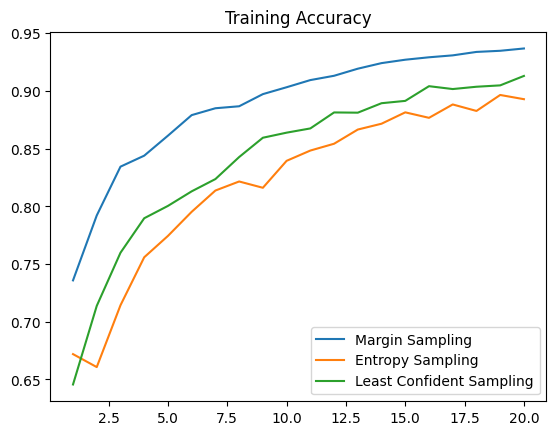

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

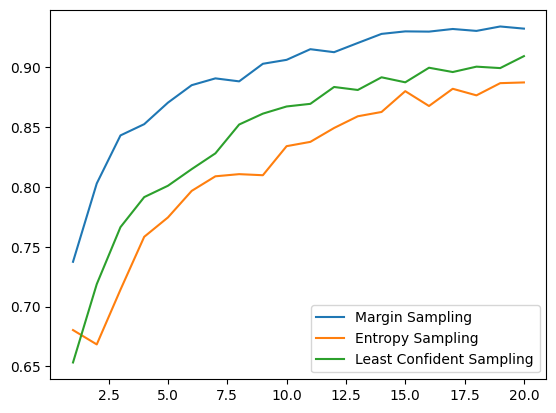

In [ ]:
import matplotlib.pyplot as plt
# plot the results
query_rounds = np.arange(n_queries) + 1
plt.plot(query_rounds, train_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, train_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, train_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title('Training Accuracy')
plt.show()

plt.plot(query_rounds, test_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, test_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, test_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title

# ***Second Dataset***
___________________________________________

# ***Using Breast Cancer Wisconsin dataset with 3 Active Learning Strategy***
_____________________________________________________________________________

# ***imbalanced dataset***
## ***The dataset has:***
*   357 benign cases
*   212 malignant cases




In [ ]:
# import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from modAL.models import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
import numpy as np
np.random.seed(42)
# load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#printing the shapes of the vectors 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

# scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train: (455, 30)
Y_train: (455,)
X_test:  (114, 30)
Y_test:  (114,)


In [ ]:
b=0
m=0
for i in range (len(y)):
  if(y[i]==0):
    m+=1
  elif(y[i]==1):
    b+=1
print("number of benign cases is: ",b)
print("number of malignant cases is: ",m)

number of benign cases is:  357
number of malignant cases is:  212


In [ ]:
# initialize a small labeled set of 10 data points
n_initial = 10
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]


In [ ]:
# initialize a random forest classifier
clf = RandomForestClassifier()

In [ ]:
# initialize performance lists
train_acc_margin_1 = []
test_acc_margin_1 = []
train_acc_entropy_1 = []
test_acc_entropy_1 = []
train_acc_lc_1 = []
test_acc_lc_1 = []

# ***Margin Sampling Strategy***

In [ ]:

# create an active learner with the margin sampling strategy
learner_margin = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=margin_sampling
)
# train the classifiers with active learning
n_queries = 10 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using margin sampling
    query_idx_margin, query_instance_margin = learner_margin.query(X_train, n_instances=10)
    # get labels for the queried instances
    y_query_margin = y_train[query_idx_margin]
    # teach the learners the queried instances
    learner_margin.teach(X_train[query_idx_margin], y_query_margin)
    # evaluate the learners on the training and testing sets
    training_accuracy_margin = learner_margin.score(X_train, y_train)
    testing_accuracy_margin = learner_margin.score(X_test, y_test)
    # store the performance
    train_acc_margin_1.append(training_accuracy_margin)
    test_acc_margin_1.append(testing_accuracy_margin)
    # print the results
    print(f"Margin Sampling: Training accuracy = {training_accuracy_margin:.3f}, Test accuracy = {testing_accuracy_margin:.3f}")


Query round 1
Margin Sampling: Training accuracy = 0.945, Test accuracy = 0.930
Query round 2
Margin Sampling: Training accuracy = 0.947, Test accuracy = 0.947
Query round 3
Margin Sampling: Training accuracy = 0.958, Test accuracy = 0.947
Query round 4
Margin Sampling: Training accuracy = 0.978, Test accuracy = 0.974
Query round 5
Margin Sampling: Training accuracy = 0.978, Test accuracy = 0.965
Query round 6
Margin Sampling: Training accuracy = 0.989, Test accuracy = 0.965
Query round 7
Margin Sampling: Training accuracy = 0.989, Test accuracy = 0.974
Query round 8
Margin Sampling: Training accuracy = 0.993, Test accuracy = 0.965
Query round 9
Margin Sampling: Training accuracy = 0.996, Test accuracy = 0.965
Query round 10
Margin Sampling: Training accuracy = 0.996, Test accuracy = 0.974


# ***Entropy Sampling Strategy***

In [ ]:
# create an active learner with the entropy sampling strategy
learner_entropy = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=entropy_sampling
)
# train the classifiers with active learning
n_queries = 10 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using entropy sampling
    query_idx_entropy, query_instance_entropy = learner_entropy.query(X_train, n_instances=10)
    # get labels for the queried instances
    y_query_entropy = y_train[query_idx_entropy]
    # teach the learners the queried instances
    learner_entropy.teach(X_train[query_idx_entropy], y_query_entropy)
    # evaluate the learners on the training and testing sets
    training_accuracy_entropy = learner_entropy.score(X_train, y_train)
    testing_accuracy_entropy = learner_entropy.score(X_test, y_test)
    # store the performance
    train_acc_entropy_1.append(training_accuracy_entropy)
    test_acc_entropy_1.append(testing_accuracy_entropy)
    # print the results
    print(f"Entropy Sampling: Training accuracy = {training_accuracy_entropy:.3f}, Test accuracy = {testing_accuracy_entropy:.3f}")

Query round 1
Entropy Sampling: Training accuracy = 0.932, Test accuracy = 0.956
Query round 2
Entropy Sampling: Training accuracy = 0.958, Test accuracy = 0.965
Query round 3
Entropy Sampling: Training accuracy = 0.980, Test accuracy = 0.965
Query round 4
Entropy Sampling: Training accuracy = 0.982, Test accuracy = 0.956
Query round 5
Entropy Sampling: Training accuracy = 0.989, Test accuracy = 0.965
Query round 6
Entropy Sampling: Training accuracy = 0.991, Test accuracy = 0.974
Query round 7
Entropy Sampling: Training accuracy = 0.996, Test accuracy = 0.974
Query round 8
Entropy Sampling: Training accuracy = 0.996, Test accuracy = 0.956
Query round 9
Entropy Sampling: Training accuracy = 0.996, Test accuracy = 0.965
Query round 10
Entropy Sampling: Training accuracy = 0.996, Test accuracy = 0.974


# ***Least Confident Sampling Strategy***

In [ ]:
# create an active learner with the least confident sampling strategy
learner_lc = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=uncertainty_sampling
)
# train the classifiers with active learning
n_queries = 10 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using least confident sampling
    query_idx_lc, query_instance_lc = learner_lc.query(X_train, n_instances=10)
    # get labels for the queried instances
    y_query_lc = y_train[query_idx_lc]
    # teach the learners the queried instances
    learner_lc.teach(X_train[query_idx_lc], y_query_lc)
    # evaluate the learners on the training and testing sets
    training_accuracy_lc = learner_lc.score(X_train, y_train)
    testing_accuracy_lc = learner_lc.score(X_test, y_test)
    # store the performance
    train_acc_lc_1.append(training_accuracy_lc)
    test_acc_lc_1.append(testing_accuracy_lc)
    # print the results
    print(f"Least Confident Sampling: Training accuracy = {training_accuracy_lc:.3f}, Test accuracy = {testing_accuracy_lc:.3f}")


Query round 1
Least Confident Sampling: Training accuracy = 0.934, Test accuracy = 0.921
Query round 2
Least Confident Sampling: Training accuracy = 0.969, Test accuracy = 0.974
Query round 3
Least Confident Sampling: Training accuracy = 0.965, Test accuracy = 0.956
Query round 4
Least Confident Sampling: Training accuracy = 0.978, Test accuracy = 0.982
Query round 5
Least Confident Sampling: Training accuracy = 0.989, Test accuracy = 0.965
Query round 6
Least Confident Sampling: Training accuracy = 0.989, Test accuracy = 0.974
Query round 7
Least Confident Sampling: Training accuracy = 0.991, Test accuracy = 0.974
Query round 8
Least Confident Sampling: Training accuracy = 0.993, Test accuracy = 0.974
Query round 9
Least Confident Sampling: Training accuracy = 0.993, Test accuracy = 0.974
Query round 10
Least Confident Sampling: Training accuracy = 0.996, Test accuracy = 0.974


# ***Ploting***

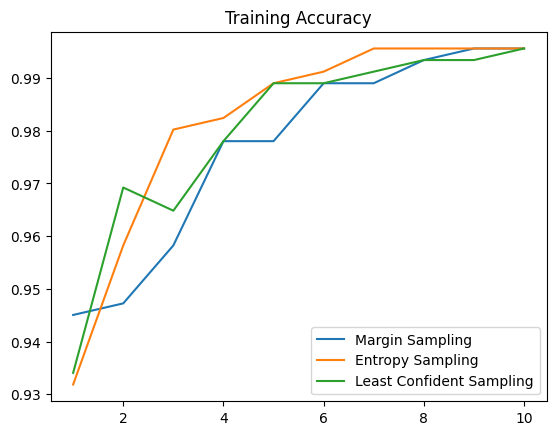

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

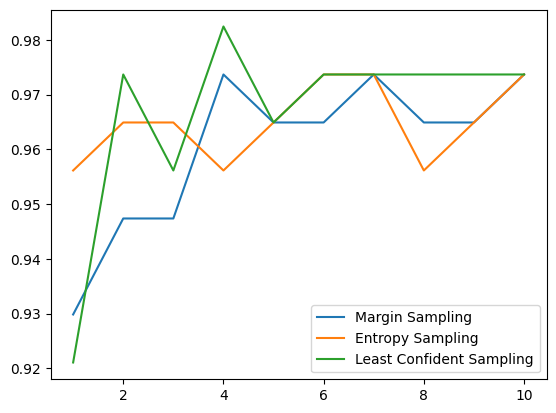

In [ ]:
import matplotlib.pyplot as plt
# plot the results
query_rounds = np.arange(n_queries) + 1
plt.plot(query_rounds, train_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, train_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, train_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title('Training Accuracy')
plt.show()

plt.plot(query_rounds, test_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, test_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, test_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title

# ***Third Dataset***

# ***Using Iris dataset with 3 Active Learning Strategy***

In [ ]:
# import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(42)

# load the Iris dataset
iris = load_iris()
X, y = iris['data'], iris['target']

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#printing the shapes of the vectors 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

# scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train: (120, 4)
Y_train: (120,)
X_test:  (30, 4)
Y_test:  (30,)


In [ ]:
# initialize a small labeled set of 5 data points
n_initial = 5
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

In [ ]:
# initialize a support vector machine classifier
clf = SVC(probability=True)

In [ ]:
# initialize performance lists
train_acc_margin_1 = []
test_acc_margin_1 = []
train_acc_entropy_1 = []
test_acc_entropy_1 = []
train_acc_lc_1 = []
test_acc_lc_1 = []

# ***Margin Sampling Strategy***

In [ ]:

# create an active learner with the margin sampling strategy
learner_margin = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=margin_sampling
)
# train the classifiers with active learning
n_queries = 5 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using margin sampling
    query_idx_margin, query_instance_margin = learner_margin.query(X_train, n_instances=5)
    # get labels for the queried instances
    y_query_margin = y_train[query_idx_margin]
    # teach the learners the queried instances
    learner_margin.teach(X_train[query_idx_margin], y_query_margin)
    # evaluate the learners on the training and testing sets
    training_accuracy_margin = learner_margin.score(X_train, y_train)
    testing_accuracy_margin = learner_margin.score(X_test, y_test)
    # store the performance
    train_acc_margin_1.append(training_accuracy_margin)
    test_acc_margin_1.append(testing_accuracy_margin)
    # print the results
    print(f"Margin Sampling: Training accuracy = {training_accuracy_margin:.3f}, Test accuracy = {testing_accuracy_margin:.3f}")


Query round 1
Margin Sampling: Training accuracy = 0.833, Test accuracy = 0.933
Query round 2
Margin Sampling: Training accuracy = 0.775, Test accuracy = 0.800
Query round 3
Margin Sampling: Training accuracy = 0.842, Test accuracy = 0.900
Query round 4
Margin Sampling: Training accuracy = 0.933, Test accuracy = 1.000
Query round 5
Margin Sampling: Training accuracy = 0.917, Test accuracy = 0.967


# ***Entropy Sampling Strategy***

In [ ]:
# create an active learner with the entropy sampling strategy
learner_entropy = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=entropy_sampling
)
# train the classifiers with active learning
n_queries = 5 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using entropy sampling
    query_idx_entropy, query_instance_entropy = learner_entropy.query(X_train, n_instances=5)
    # get labels for the queried instances
    y_query_entropy = y_train[query_idx_entropy]
    # teach the learners the queried instances
    learner_entropy.teach(X_train[query_idx_entropy], y_query_entropy)
    # evaluate the learners on the training and testing sets
    training_accuracy_entropy = learner_entropy.score(X_train, y_train)
    testing_accuracy_entropy = learner_entropy.score(X_test, y_test)
    # store the performance
    train_acc_entropy_1.append(training_accuracy_entropy)
    test_acc_entropy_1.append(testing_accuracy_entropy)
    # print the results
    print(f"Entropy Sampling: Training accuracy = {training_accuracy_entropy:.3f}, Test accuracy = {testing_accuracy_entropy:.3f}")

Query round 1
Entropy Sampling: Training accuracy = 0.833, Test accuracy = 0.933
Query round 2
Entropy Sampling: Training accuracy = 0.833, Test accuracy = 0.933
Query round 3
Entropy Sampling: Training accuracy = 0.833, Test accuracy = 0.833
Query round 4
Entropy Sampling: Training accuracy = 0.900, Test accuracy = 0.967
Query round 5
Entropy Sampling: Training accuracy = 0.958, Test accuracy = 0.967


# ***Least Confident Sampling Strategy***

In [ ]:
# create an active learner with the least confident sampling strategy
learner_lc = ActiveLearner(
    estimator=clf,
    X_training=X_initial, y_training=y_initial,
    query_strategy=uncertainty_sampling
)
# train the classifiers with active learning
n_queries = 5 # number of query rounds
for round in range(n_queries):
    print(f"Query round {round+1}")
    # get indices of the most informative data points using least confident sampling
    query_idx_lc, query_instance_lc = learner_lc.query(X_train, n_instances=5)
    # get labels for the queried instances
    y_query_lc = y_train[query_idx_lc]
    # teach the learners the queried instances
    learner_lc.teach(X_train[query_idx_lc], y_query_lc)
    # evaluate the learners on the training and testing sets
    training_accuracy_lc = learner_lc.score(X_train, y_train)
    testing_accuracy_lc = learner_lc.score(X_test, y_test)
    # store the performance
    train_acc_lc_1.append(training_accuracy_lc)
    test_acc_lc_1.append(testing_accuracy_lc)
    # print the results
    print(f"Least Confident Sampling: Training accuracy = {training_accuracy_lc:.3f}, Test accuracy = {testing_accuracy_lc:.3f}")


Query round 1
Least Confident Sampling: Training accuracy = 0.833, Test accuracy = 0.933
Query round 2
Least Confident Sampling: Training accuracy = 0.792, Test accuracy = 0.900
Query round 3
Least Confident Sampling: Training accuracy = 0.950, Test accuracy = 1.000
Query round 4
Least Confident Sampling: Training accuracy = 0.958, Test accuracy = 0.967
Query round 5
Least Confident Sampling: Training accuracy = 0.967, Test accuracy = 0.967


# ***Ploting***

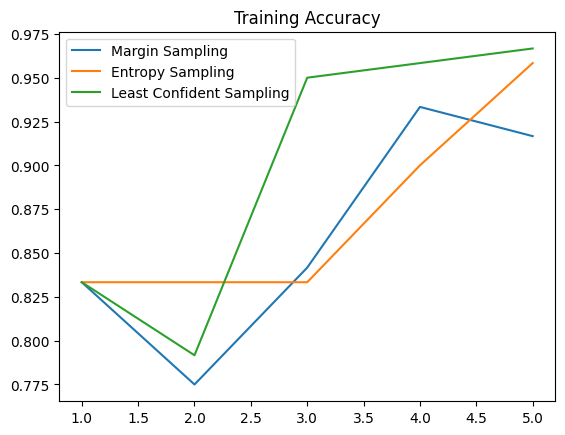

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

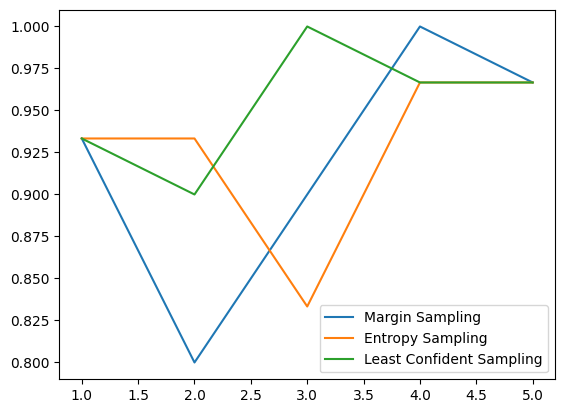

In [ ]:
import matplotlib.pyplot as plt
# plot the results
query_rounds = np.arange(n_queries) + 1
plt.plot(query_rounds, train_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, train_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, train_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title('Training Accuracy')
plt.show()

plt.plot(query_rounds, test_acc_margin_1, label='Margin Sampling')
plt.plot(query_rounds, test_acc_entropy_1, label='Entropy Sampling')
plt.plot(query_rounds, test_acc_lc_1, label='Least Confident Sampling')
plt.legend()
plt.title